In [109]:
import pandas as pd
import numpy as np
import json
import copy

from collections import Counter

import os
import glob

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.dpi'] = 300
sns.set_theme()

harDir = 'Data/HarassmentAbuse/'
theftDir = 'Data/TheftLostItem/'
chat_file = 'data/subset_1/chat_subset_1.csv'

In [106]:
# all annotations
domains = ['HarassmentAbuse', 'TheftLostItem']
names = {}
dirs = {}

dirs['HarassmentAbuse'] = glob.glob('../outputs/subset_1/HarassmentAbuse/*.txt', recursive=True)
names['HarassmentAbuse'] = [os.path.basename(x) for x in dirs['HarassmentAbuse']]
dirs['TheftLostItem'] = glob.glob('../outputs/subset_1/TheftLostItem/*.txt', recursive=True)
names['TheftLostItem'] = [os.path.basename(x) for x in dirs['TheftLostItem']]

names

{'HarassmentAbuse': ['event_1001270.txt',
  'event_1002693.txt',
  'event_1003647.txt',
  'event_1008692.txt',
  'event_1013366.txt',
  'event_1015396.txt',
  'event_1015546.txt',
  'event_1024673.txt',
  'event_1025925.txt',
  'event_1038585.txt',
  'event_1039664.txt',
  'event_1049621.txt',
  'event_1059563.txt',
  'event_1068238.txt',
  'event_1070064.txt',
  'event_1088398.txt',
  'event_1094546.txt',
  'event_1106380.txt',
  'event_1124079.txt',
  'event_1132921.txt',
  'event_1142902.txt',
  'event_1162046.txt',
  'event_1162552.txt',
  'event_1168808.txt',
  'event_1204540.txt',
  'event_1211586.txt',
  'event_1214862.txt',
  'event_1221081.txt',
  'event_1224372.txt',
  'event_1227902.txt',
  'event_1230056.txt',
  'event_1231902.txt',
  'event_1234843.txt',
  'event_1239324.txt',
  'event_1240344.txt',
  'event_1252184.txt',
  'event_1252749.txt',
  'event_1253319.txt',
  'event_1254679.txt',
  'event_1254988.txt',
  'event_1255054.txt',
  'event_1255114.txt',
  'event_125577

In [9]:
{k:len(names[k]) for k in names}

{'HarassmentAbuse': 299, 'TheftLostItem': 280}

In [72]:
class Conversation():
    def __init__(self):
        self.texts = {} # {utter#: text}
        self.args_by_turn = {} # {utter#: {arg: [text]}}
        self.args_accum_by_turn = {} # accumulated args by turn {utter#: {arg: set(text)}} 
        self.args_all = {} # {arg: set(text)}
        self.event_id = None
        self.domain = None
    
    def from_file(self, file_path):
        self.event_id = file_path.split('_')[-1].split('.')[0]
        for domain in domains:
            if domain in file_path:
                self.domain = domain
        args_accum = {}
        self.args_by_turn = {}
        self.args_accum_by_turn = {}
        with open(file_path, 'r') as f:
            for i, line in enumerate(f):
                args = eval(line)
                for k in args:
                    if k not in args_accum:
                        args_accum[k] = set()
                    args_accum[k].update(args[k])
                self.args_by_turn[i] = {k: set(args[k]) for k in args}
                self.args_accum_by_turn[i] = copy.deepcopy(args_accum)
            self.args_all = copy.deepcopy(args_accum)
        # print(self.args_all)
        return self

    def to_dict(self, by_turn=False):
        if by_turn:
            dicts = []
            for tid in self.args_by_turn:
                dicts.append({
                'event_id': self.event_id,
                'domain': self.domain,
                'turn_id': tid,
                'args_all': self.args_all,
                'args_by_turn': self.args_by_turn[tid],
                'args_accum_by_turn': self.args_accum_by_turn[tid],
            })
            return dicts
        else:
            return {
                'event_id': self.event_id,
                'domain': self.domain,
                'args_all': self.args_all,
                'args_by_turn': self.args_by_turn,
                'args_accum_by_turn': self.args_accum_by_turn,
            }


In [55]:
file_path = '../outputs/subset_1/HarassmentAbuse/event_782641.txt'

args_accum = {}
args_by_turn = {}
args_accum_by_turn = {}
with open(file_path, 'r') as f:
    for i, line in enumerate(f):
        args = eval(line)
        for k in args:
            if k not in args_accum:
                args_accum[k] = set()
            args_accum[k].update(args[k])
        args_by_turn[i] = {k: set(args[k]) for k in args}
        args_accum_by_turn[i] = copy.deepcopy(args_accum)
    args_all = copy.deepcopy(args_accum)


In [33]:
args_by_turn

{0: {'Target-ARG': set(),
  'Place-Arg': set(),
  'Attacker-Arg': set(),
  'End_Time-Arg': set()},
 1: {'Target-ARG': set(),
  'Place-Arg': set(),
  'Attacker-Arg': set(),
  'End_Time-Arg': set()},
 2: {'Target-ARG': set(),
  'Place-Arg': {' bus stop/admissions area'},
  'Attacker-Arg': set(),
  'End_Time-Arg': set()},
 3: {'Target-ARG': {''},
  'Place-Arg': {' bus stop/admissions area'},
  'Attacker-Arg': set(),
  'End_Time-Arg': set()},
 4: {'Target-ARG': {'Homeless man'},
  'Place-Arg': {' bus stop/admissions area'},
  'Attacker-Arg': set(),
  'End_Time-Arg': set()}}

### Analysis

In [76]:
convos = []
for domain in domains:
    for dir in dirs[domain]:
        convo = Conversation().from_file(dir)
        convos.extend(convo.to_dict(by_turn=True))

In [77]:
convos

[{'event_id': '1001270',
  'domain': 'HarassmentAbuse',
  'turn_id': 0,
  'args_all': {'Target-ARG': set(),
   'Place-Arg': {'ORG] Locker Room Showers'},
   'Attacker-Arg': {' [NORP] male'},
   'End_Time-Arg': {''}},
  'args_by_turn': {'Target-ARG': set(),
   'Place-Arg': {'ORG] Locker Room Showers'},
   'Attacker-Arg': {' [NORP] male'},
   'End_Time-Arg': {''}},
  'args_accum_by_turn': {'Target-ARG': set(),
   'Place-Arg': {'ORG] Locker Room Showers'},
   'Attacker-Arg': {' [NORP] male'},
   'End_Time-Arg': {''}}},
 {'event_id': '1001270',
  'domain': 'HarassmentAbuse',
  'turn_id': 1,
  'args_all': {'Target-ARG': set(),
   'Place-Arg': {'ORG] Locker Room Showers'},
   'Attacker-Arg': {' [NORP] male'},
   'End_Time-Arg': {''}},
  'args_by_turn': {'Target-ARG': set(),
   'Place-Arg': {'ORG] Locker Room Showers'},
   'Attacker-Arg': {' [NORP] male'},
   'End_Time-Arg': set()},
  'args_accum_by_turn': {'Target-ARG': set(),
   'Place-Arg': {'ORG] Locker Room Showers'},
   'Attacker-Arg': 

In [78]:
df_convos = pd.DataFrame(convos)
df_convos

,event_id,domain,turn_id,args_all,args_by_turn,args_accum_by_turn
0,1001270,HarassmentAbuse,0,"{'Target-ARG': {}, 'Place-Arg': {'ORG] Locker ...","{'Target-ARG': {}, 'Place-Arg': {'ORG] Locker ...","{'Target-ARG': {}, 'Place-Arg': {'ORG] Locker ..."
1,1001270,HarassmentAbuse,1,"{'Target-ARG': {}, 'Place-Arg': {'ORG] Locker ...","{'Target-ARG': {}, 'Place-Arg': {'ORG] Locker ...","{'Target-ARG': {}, 'Place-Arg': {'ORG] Locker ..."
2,1001270,HarassmentAbuse,2,"{'Target-ARG': {}, 'Place-Arg': {'ORG] Locker ...","{'Target-ARG': {}, 'Place-Arg': {'ORG] Locker ...","{'Target-ARG': {}, 'Place-Arg': {'ORG] Locker ..."
3,1001270,HarassmentAbuse,3,"{'Target-ARG': {}, 'Place-Arg': {'ORG] Locker ...","{'Target-ARG': {}, 'Place-Arg': {'ORG] Locker ...","{'Target-ARG': {}, 'Place-Arg': {'ORG] Locker ..."
4,1001270,HarassmentAbuse,4,"{'Target-ARG': {}, 'Place-Arg': {'ORG] Locker ...","{'Target-ARG': {}, 'Place-Arg': {'ORG] Locker ...","{'Target-ARG': {}, 'Place-Arg': {'ORG] Locker ..."
...,...,...,...,...,...,...
5333,993897,TheftLostItem,4,"{'Target-ARG': {}, 'Place-Arg': {' my garage'}...","{'Target-ARG': {}, 'Place-Arg': {}, 'Attacker-...","{'Target-ARG': {}, 'Place-Arg': {' my garage'}..."
5334,993897,TheftLostItem,5,"{'Target-ARG': {}, 'Place-Arg': {' my garage'}...","{'Target-ARG': {}, 'Place-Arg': {}, 'Attacker-...","{'Target-ARG': {}, 'Place-Arg': {' my garage'}..."
5335,993897,TheftLostItem,6,"{'Target-ARG': {}, 'Place-Arg': {' my garage'}...","{'Target-ARG': {}, 'Place-Arg': {}, 'Attacker-...","{'Target-ARG': {}, 'Place-Arg': {' my garage'}..."
5336,993897,TheftLostItem,7,"{'Target-ARG': {}, 'Place-Arg': {' my garage'}...","{'Target-ARG': {}, 'Place-Arg': {}, 'Attacker-...","{'Target-ARG': {}, 'Place-Arg': {' my garage'}..."


In [93]:
# Calculate the percentage of event information (argument) provided by user in the first message
# , out of the whole conversation
# By incident categories
def count_hit(row):
#     print(row)
    eventArgs = row['args_accum_by_turn']
    eventCat = row['domain']

    args = []
    for arg in eventArgs:
        if len(eventArgs[arg]) > 0:
            args.append(arg)
    if eventCat == 'HarassmentAbuse':
        s = ['Place-Arg', 'Target-ARG', 'Attacker-Arg', 'End_Time-Arg']
        return len([i for i in args if i in s]) / len(s)
    elif eventCat == 'TheftLostItem':
        s = ['Place-Arg', 'Target-ARG', 'Attacker-Arg', 'End_Time-Arg', 
        'Target_Object-Arg', 'Start_Time-Arg']
        return len([i for i in args if i in s]) / len(s)

df_convos['ratio_args'] = df_convos.apply(count_hit, axis=1)
df_convos

df_convos.groupby(['domain', 'turn_id'])['ratio_args'].mean()
# df_convos.groupby(['domain', 'turn_id'])['ratio_args'].std()

domain           turn_id
HarassmentAbuse  0          0.353679
                 1          0.387960
                 2          0.434783
                 3          0.467391
                 4          0.496656
                              ...   
TheftLostItem    23         0.333333
                 24         0.375000
                 25         0.333333
                 26         0.666667
                 27         0.666667
Name: ratio_args, Length: 68, dtype: float64

Text(0, 0.5, '% of event arguments collected')

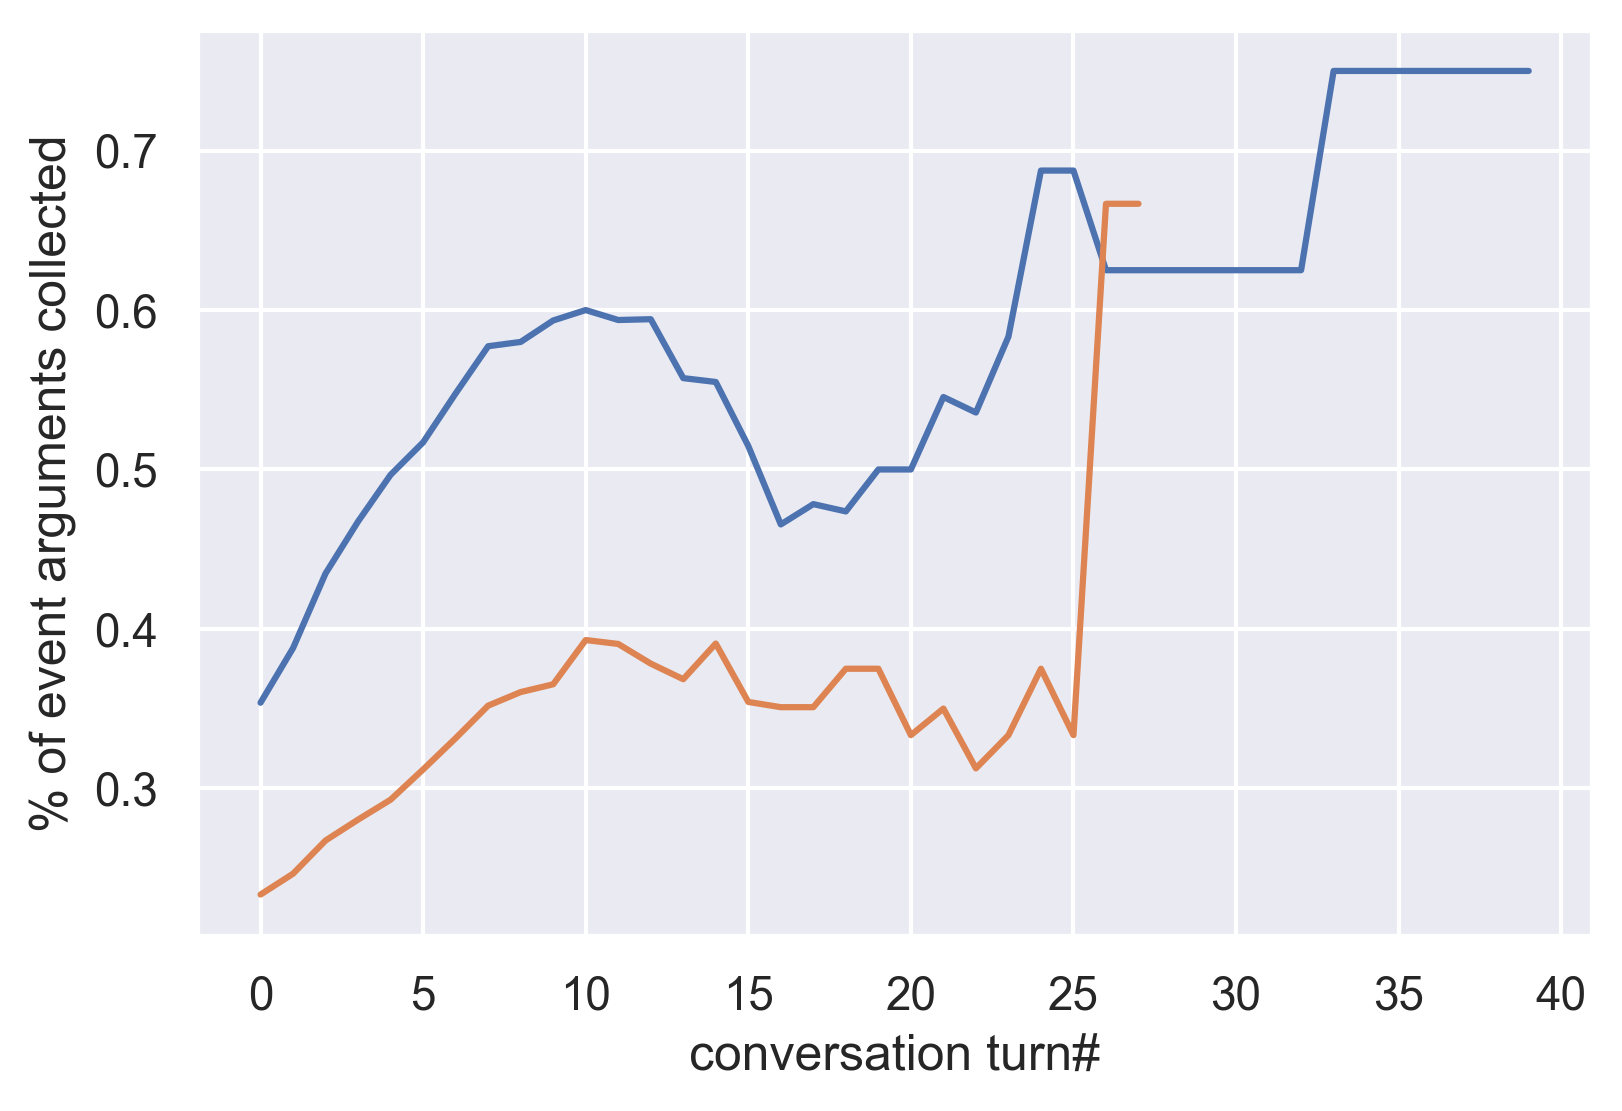

In [112]:
ratio_Harass = df_convos.groupby(['domain', 'turn_id'])['ratio_args'].mean()['HarassmentAbuse']
ratio_Theft = df_convos.groupby(['domain', 'turn_id'])['ratio_args'].mean()['TheftLostItem']

plt.plot(ratio_Harass)
plt.plot(ratio_Theft)

plt.xlabel('conversation turn#')
plt.ylabel('% of event arguments collected')